# ⇨ Part Three: Preliminary Plotting and Data Investigation

In this section I am experimenting with different configurations of the data with unsupervised clustering just to see what kinds of information might be gained. We already know there is a strong correlation to the phase of the moon and somewhat to the day of the week. So here I will be basically juggling data just to see if there is anything else at all I can find in the data, trends, and so forth, that will help as I move forward with the investigation.

In [1]:
%%capture
!pip install numpy

In [2]:
%%capture
!pip install pandas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from zipfile import ZipFile
from urllib.request import urlretrieve
import plotly.express as px

 [Pandas Profiling - Masterframe with Averages (instead of NaNs)](http://www.evanmarie.com/content/files/notebooks/puppy_data_averages.html)<br>
[Pandas Profiling - Masterframe with Zeros (instead of NaNs)](http://35.171.2.246/home/bitnami/stack/ghost/content/files/notebooks/puppy_data_zeros.html)

In [5]:
files = ("http://www.evanmarie.com/content/files/dataframes/merged_data.zip")
urlretrieve(files, 'merged_data.zip')
with ZipFile('merged_data.zip') as zipped_data:
  zipped_data.extractall(path='merged_data')

In [8]:
df_avgs = pd.read_csv('merged_data/df_avgs.csv')
df_zeros = pd.read_csv('merged_data/df_zeros.csv')

## Preliminary Plotting

In [9]:
#@title 📊 plot_barh(df, column_y, column_x, title=None, color=None, xlabel=None, ylabel=None) { display-mode: "form" }
def plot_barh(df, column_y, column_x, title=None, color=None, xlabel=None, ylabel=None):
  %matplotlib inline
  plt.style.use('dark_background')
  plt.figure(figsize=(12, 8), facecolor='#413e4d')
  ax = plt.axes()
  ax.set_facecolor("#261b4a")
  plt.minorticks_on()
  plt.xticks(fontsize = 13)
  plt.yticks(fontsize = 13) 
  plt.grid(color='#bfbec2', linestyle=':', linewidth=2, alpha = .8)
  plt.grid(b=True, which='minor', color='#bfbec2',  linestyle='-', alpha=0.4)
  df_avgs.groupby(column_x)[column_y].mean().plot(kind='barh', color=color)
  plt.title("Averages: " + title, fontsize = 24, fontweight='bold', pad=20)
  ax.set_xlabel(xlabel, fontsize = 18)
  ax.set_ylabel(ylabel + " Averages", fontsize=18)
  plt.show()

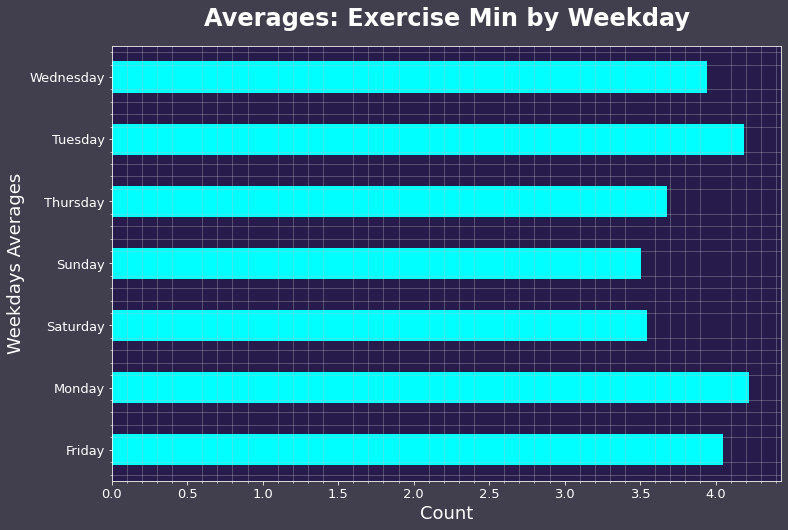

In [10]:
plot_barh(df_avgs, 'ex_min', 'wkdy', title="Exercise Min by Weekday", color="cyan", xlabel="Count", ylabel="Weekdays")

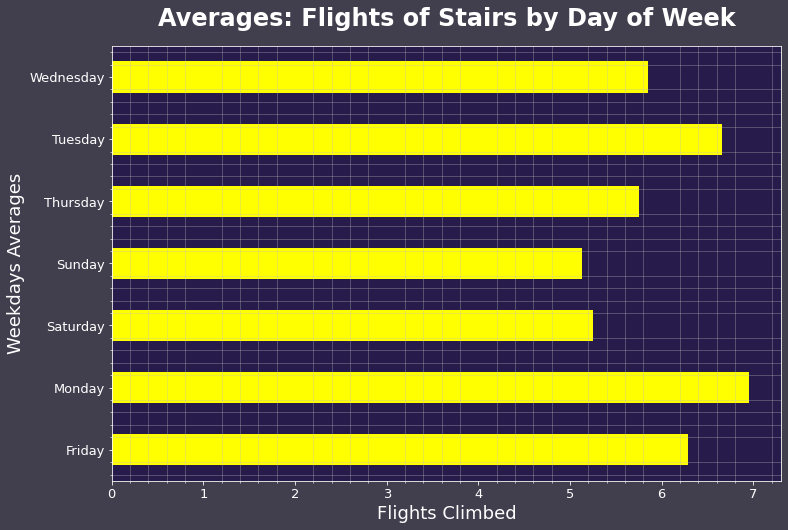

In [ ]:
plot_barh(df_avgs, 'climb', 'wkdy', title="Flights of Stairs by Day of Week", color='yellow', xlabel='Flights Climbed', ylabel= 'Weekdays')

In [ ]:
#@title 📊 plot_scatter(df, column_x, column_y, column_z, title=None, xlabel=None, ylabel=None, leg_labels=None) { display-mode: "form" }
# Function to create a scatterplot of the given columns
def plot_scatter(df, column_x, column_y, column_z, title=None, xlabel=None, ylabel=None, leg_labels=None):
    %matplotlib inline
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 8), facecolor='#413e4d')
    ax = plt.axes()
    ax.set_facecolor("#e0e6ff")
    plt.minorticks_on()
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.grid(color='#bfbec2', linestyle=':', linewidth=2, alpha = .8)
    plt.grid(b=True, which='minor', color='#bfbec2',  linestyle='-', alpha=0.4)
    sns.scatterplot(x=column_x, y=column_y, hue=column_z, data = df, palette="magma")
    plt.title(title, fontsize = 24, fontweight='bold', pad=20)
    ax.set_xlabel(xlabel, fontsize = 18)
    ax.set_ylabel(ylabel, fontsize=18)
    plt.legend(labels = leg_labels, facecolor='#707070', bbox_to_anchor=(1.1, 1.0), borderaxespad=0, fontsize=11)
    plt.show()

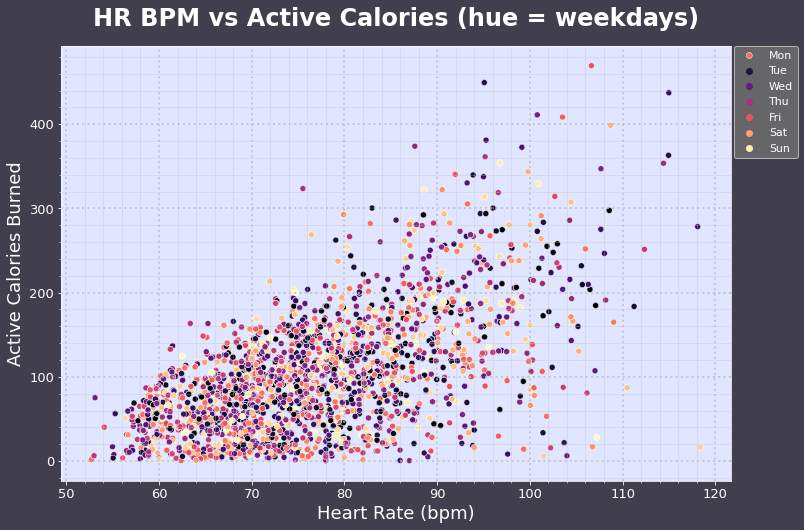

In [ ]:
leg_labels = ["Mon", "Tue", "Wed", 'Thu', 'Fri', 'Sat', 'Sun']
plot_scatter(df_avgs, 'hr_bpm', 'act_cal', 'dy', title="HR BPM vs Active Calories (hue = weekdays)", xlabel="Heart Rate (bpm)", 
             ylabel="Active Calories Burned", leg_labels = leg_labels)

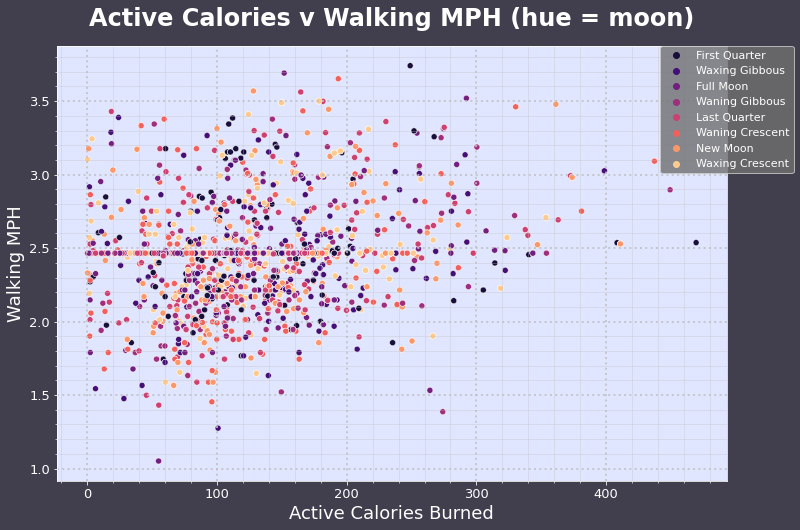

In [ ]:
plot_scatter(df_avgs, 'act_cal', 'wlk_mph', 'moon', title="Active Calories v Walking MPH (hue = moon)", 
             xlabel="Active Calories Burned", ylabel="Walking MPH")

In [ ]:
#@title plotly_hist(df, column_x, column_y, title=None, xlabel=None, ylabel=None) { display-mode: "form" }
def plotly_hist(df, column_x, column_y, title=None, xlabel=None, ylabel=None):
    fig = px.histogram(df, x=column_x, y=column_y, title=title, labels={column_x: xlabel, column_y: ylabel})
    fig.update_layout(
            font_family="Verdana",
            font_color="white",
            width=900,
            title_font_color = "white",
            legend_font_color = 'white',
            legend_bgcolor='#FCD695',
            legend_borderwidth=2,
            paper_bgcolor='#4a4a4a',
            plot_bgcolor='#261f63',
            legend_bordercolor='#62FCA0',
            font_size=14)


    fig.show()
   

In [ ]:
plotly_hist(df_avgs, "ex_min", "moon", title="Moon Phases vs Exercise Min", xlabel="exercise minutes", ylabel="Moon Phases")

## K-MEANS => Getting an idea of what the algorithm finds before creating training and validation sets.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
# Drop the 0 column and the wkdy column
df_to_model = df_avgs.drop(columns=['wkdy'])

In [ ]:
num_cols = ['yr', 'mo', 'dy', 'dy_cat', 'act_cal', 'dist_mi',
       'env_au_db', 'ex_min', 'climb', 'climb_dur', 'hr_act', 'hr_bpm',
       'hr_var_ms', 'o2_sat', 'o2_sat_kpa', 'rest_cal', 'rest_dur', 'upst_dur',
       'upst_ft/sec', 'dwnst_dur', 'dwnst_ft/sec', 'stnd_min',
       'stand_time_duration_sec_avg', 'stp_cnt', 'stp_cnt_sec', 'stp_ins',
       'wlk_mph', 'wlk_mph_dur', 'wlk_dbl_%', 'wlk_dbl_dur', 'wlk_bpm']


In [ ]:
# Convert Moon Phase to a categorical variable
df_to_model['moon_cat'] = df_to_model['moon'].astype('category').cat.codes
df_to_model = df_to_model.drop(columns = ["moon", "dt"])

In [ ]:
scaler = MinMaxScaler().fit(df_to_model[num_cols])

In [ ]:
df_to_model[num_cols] = scaler.transform(df_to_model[num_cols])

In [ ]:
model01 = KMeans(n_clusters=3, random_state=42)

In [ ]:
model01.fit(df_to_model)

KMeans(n_clusters=3, random_state=42)

In [ ]:
preds01 = model01.predict(df_to_model)

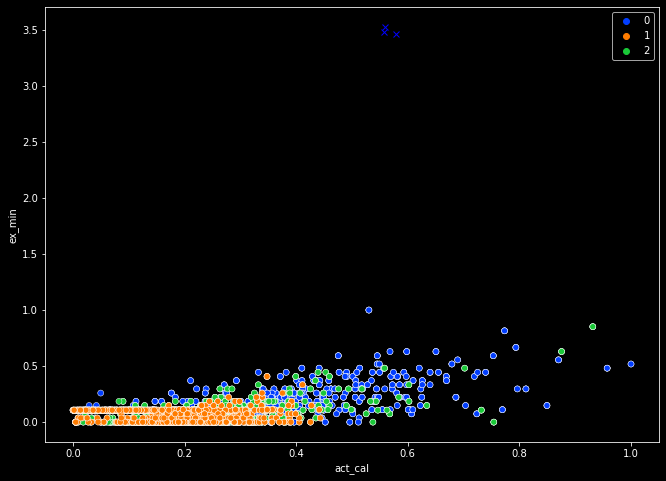

In [ ]:
plt.figure(figsize=(11,8))
sns.scatterplot(data=df_to_model, x='act_cal', y='ex_min', hue=preds01, palette="bright");
centers_x01, centers_y01 = model01.cluster_centers_[:,4], model01.cluster_centers_[:,32];
plt.plot(centers_x01, centers_y01, 'xb');

In [ ]:
df_to_model.columns

Index(['Unnamed: 0', 'yr', 'mo', 'dy', 'dy_cat', 'act_cal', 'dist_mi',
       'env_au_db', 'ex_min', 'climb', 'climb_dur', 'hr_act', 'hr_bpm',
       'hr_var_ms', 'o2_sat', 'o2_sat_kpa', 'rest_cal', 'rest_dur', 'upst_dur',
       'upst_ft/sec', 'dwnst_dur', 'dwnst_ft/sec', 'stnd_min',
       'stand_time_duration_sec_avg', 'stp_cnt', 'stp_cnt_sec', 'stp_ins',
       'wlk_mph', 'wlk_mph_dur', 'wlk_dbl_%', 'wlk_dbl_dur', 'wlk_bpm',
       'moon_cat'],
      dtype='object')

In [ ]:
group01 = df_to_model[['dy_cat', 'act_cal', 'ex_min', 'moon_cat', 'dy']]

In [ ]:
model.fit(group01)

KMeans(n_clusters=3, random_state=42)

In [ ]:
preds_group01 = model.predict(group01)

In [ ]:
group01.columns

Index(['dy_cat', 'act_cal', 'ex_min', 'moon_cat', 'dy'], dtype='object')

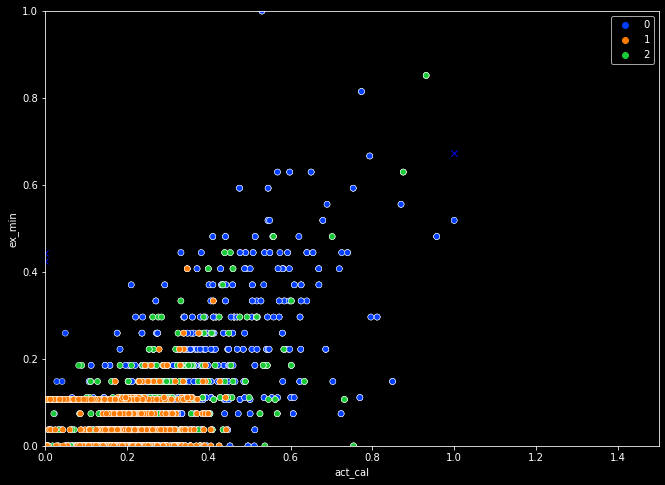

In [ ]:
plt.figure(figsize=(11,8))
sns.scatterplot(data=group01, x='act_cal', y='ex_min', hue=preds, palette="bright");
centers_x02, centers_y02 = model.cluster_centers_[:,3], model.cluster_centers_[:,4];
plt.xlim(left =0 , right = 1.5)
plt.ylim(bottom = 0, top = 1)
plt.plot(centers_x, centers_y, 'xb');

<Figure size 720x576 with 0 Axes>

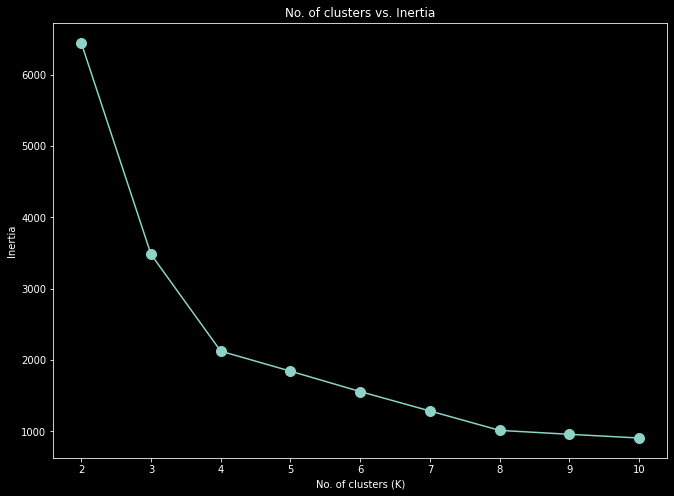

In [ ]:
options = range(2,11)
inertias = []
plt.figure(figsize=(10,8))
for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(group01)
    inertias.append(model.inertia_)
    
plt.figure(figsize = (11,8));
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', markersize=10)
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [ ]:
model_4clus = KMeans(n_clusters = 4, random_state = 42)

In [ ]:
model_4clus.fit(group01)

KMeans(n_clusters=4, random_state=42)

In [ ]:
preds_4clus = model_4clus.predict(group01)

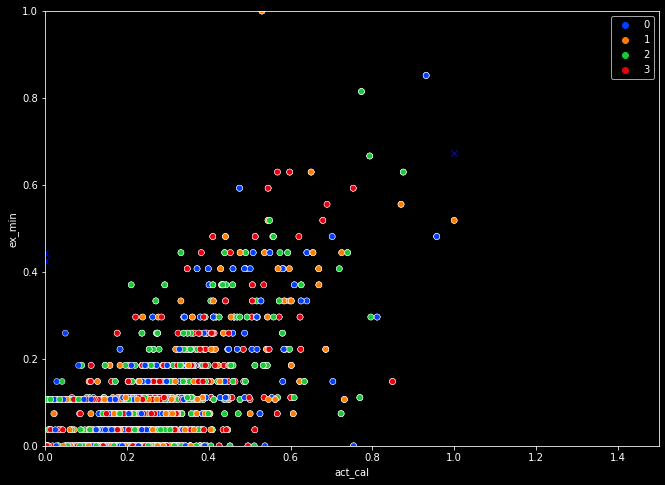

In [ ]:
plt.figure(figsize=(11,8))
sns.scatterplot(data=group01, x='act_cal', y='ex_min', hue=preds_4clus, palette="bright");
centers_x, centers_y = model.cluster_centers_[:,3], model.cluster_centers_[:,4];
plt.xlim(left =0 , right = 1.5)
plt.ylim(bottom = 0, top = 1)
plt.plot(centers_x, centers_y, 'xb');

In [ ]:
group01.columns

Index(['dy_cat', 'act_cal', 'ex_min', 'moon_cat', 'dy'], dtype='object')